# TP facultatif : Préparation du jeu de données brut

Quand on se lance avec enthousiasme dans un nouveau projet de machine-learning, on pense avant tout au choix du modèle que l'on va utiliser. Cependant, et même s'il ne s'agit pas de l'étape la plus agréable du travail, un préalable indispensable est de réunir les données brutes et de les mettre en forme pour qu'elles puissent être ingérées par le modèle.

L'objectif de ce TP est de comprendre comment, à partir de différentes sources de données, on construit nos jeux de données "propres" pour ensuite construire le meilleur modèle d'apprentissage possible pour la prévision de consommation nationale.

Nos fichiers d'entrée bruts sont les suivants :
> * historique de consommation nationale (source : Eco2mix) : Yconso_2014_2018.csv
> * calendrier des jours fériés : joursFeries.csv
> * coordonnées géographiques et les poids associés aux stations Météo France : StationsMeteoRTE.csv   
> * historique d'observations et de prévisions à 24h de température : Xtemperature.csv

Et les fichiers que l'on va créer sont :
> * Xinput.csv  # Les entrées pour le modèle d'apprentissage
> * Yconso.csv  # les sorties pour le modèle d'apprentissage

## Environnement

Chargement des librairies python, et quelques éléments de configuration.

In [78]:
# Exécutez la cellule ci-dessous (par exemple avec shift-entrée)
# Si vous exécuter ce notebook depuis votre PC, il faudra peut-etre installer certaines librairies avec 
# 'pip3 install ma_librairie'
import os  # accès aux commandes système
import datetime  # structure de données pour gérer des objets calendaires
import pandas as pd  # gérer des tables de données en python
import numpy as np  # librairie d'opérations mathématiques
import zipfile # manipulation de fichiers zip
import urllib3 # téléchargement de fichier

import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, iplot_mpl
import matplotlib.pyplot as plt  # tracer des visualisations
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%autosave 0

data_folder = os.path.join(os.getcwd(),"data")

print("")
print("Mon repertoire de data est : {}".format(data_folder))
print("")
print("Fichiers contenus dans ce répertoire :")
for file in os.listdir(data_folder):
    print(" - " + file)

Autosave disabled

Mon repertoire de data est : D:\Users\montuelleluc\Documents\Formations-RTE\MOOC IA&DeepLearning\TP_Formation_Conso_DeepLearning\data

Fichiers contenus dans ce répertoire :
 - communes_coordonnees.csv
 - eCO2mix_RTE_tempo_2017-2018.xls
 - joursFeries.csv
 - meteoX_T0_T24.zip
 - StationsMeteoRTE.csv
 - X2input.csv
 - X2input.zip
 - Xinput.csv
 - Xinput.zip
 - Xtemperature.csv
 - Xtemperature.zip
 - Yconso.csv
 - YconsoT0.csv
 - Yconso_2014_2018.csv
 - zia00436
 - zia06312
 - zia06812


## Récupération des données


### Données de consommation

Dans un premier temps on importe les données de consommation réalisée à partir du fichier "YconsoT0.csv". La date et l'heure sont données dans les deux premières colonnes, et les autres colonnes correspondent aux consommations des 12 régions françaises (hors Corse) et à la consommation nationale.

Pour cela on utilise la bibliothèque **pandas** pour la manipulation de données et la fonction **read_csv**.

#### Import depuis un csv

In [79]:
# Les données du csv sont importé dans un objet de type dataframe
conso_csv = os.path.join(data_folder, "Yconso_2014_2018.csv")
conso_df = pd.read_csv(conso_csv, sep=",")

Il faut ensuite vérifier que les données sont importées correctement

In [80]:
# Afficher les dimensions et le noms des colonnes de la data frame
print(conso_df.shape)  # Nombre de lignes, nombre de colonnes

(43824, 2)


In [81]:
# Liste des colonnes de la data-frama
print(conso_df.columns)

Index(['ds', 'y'], dtype='object')


In [82]:
# Affichage des premières lignes
print(conso_df.head(5))
print(conso_df.tail(5))

                     ds      y
0  2014-01-01T00:00:00Z  64660
1  2014-01-01T01:00:00Z  61362
2  2014-01-01T02:00:00Z  60748
3  2014-01-01T03:00:00Z  58061
4  2014-01-01T04:00:00Z  54475
                         ds      y
43819  2018-12-31T19:00:00Z  67276
43820  2018-12-31T20:00:00Z  64679
43821  2018-12-31T21:00:00Z  61496
43822  2018-12-31T22:00:00Z  59901
43823  2018-12-31T23:00:00Z  63977


#### Petit détour pour gérer les dates

Le fichier Yconso_2014_2018.csv contient en particulier la colonnes 'ds'. Celle-ci contient une variable de type "string" correspondant à la date et à l'heure. 

<img src="pictures/clock.png" width=60 height=60>

Pour manipuler facilement cette variable, il faut la convertir en variable de type **datetime**. Cela permet notamment de calculer l'heure, le jour de la semaine, le mois, l'année.

In [83]:
# On appelle "ds" (dateStamp) cette nouvelle colonne
conso_df['ds'] = pd.to_datetime(conso_df['ds'])

In [84]:
conso_df.head(5)

,ds,y
0,2014-01-01 00:00:00+00:00,64660
1,2014-01-01 01:00:00+00:00,61362
2,2014-01-01 02:00:00+00:00,60748
3,2014-01-01 03:00:00+00:00,58061
4,2014-01-01 04:00:00+00:00,54475


La cellule ci-dessous a pour but d'illustrer comment utiliser ces objets.

In [85]:
# datetime vers string
noel_2017_date = datetime.date(2017, 12, 25)
noel_2017_str = datetime.datetime.strftime(noel_2017_date, format="%Y-%m-%d")
print("noel_2017_date vaut : {}, et est de type {}".format(noel_2017_date, str(type(noel_2017_date))))
print("noel_2017_str vaut : {}, et est de type {}".format(noel_2017_str, str(type(noel_2017_str))))
print("---")

# string vers datetime
starwars_day_2017_str = "2017-05-04"
starwars_day_2017_date = datetime.datetime.strptime(starwars_day_2017_str, "%Y-%m-%d")
print("starwars_day_2017_date vaut : {}, et est de type {}".format(starwars_day_2017_date, str(type(starwars_day_2017_date))))
print("D'ailleurs, c'était le " + str(starwars_day_2017_date.weekday() + 1) + " ème jour de la semaine, où 0 correspond à lundi et 6 correspond à dimanche")
print("starwars_day_2017_str vaut : {}, et est de type {}".format(starwars_day_2017_str, str(type(starwars_day_2017_str))))
print("---")

# Voyager dans le temps
saint_sylvestre_2017_date = datetime.date(2017, 12, 31)
bienvenu_en_2018_date = saint_sylvestre_2017_date + datetime.timedelta(days=1)
print("Le 31 décembre 2017 plus un jour ça donne le {}".format(bienvenu_en_2018_date))

noel_2017_date vaut : 2017-12-25, et est de type <class 'datetime.date'>
noel_2017_str vaut : 2017-12-25, et est de type <class 'str'>
---
starwars_day_2017_date vaut : 2017-05-04 00:00:00, et est de type <class 'datetime.datetime'>
D'ailleurs, c'était le 4 ème jour de la semaine, où 0 correspond à lundi et 6 correspond à dimanche
starwars_day_2017_str vaut : 2017-05-04, et est de type <class 'str'>
---
Le 31 décembre 2017 plus un jour ça donne le 2018-01-01


### Récuperation des jours fériés

Le fichier *joursFeries.csv* contient la liste des jours fériés. 

**Attention** : la granularité temporelle est différente du fichier de consommation.

On importe le fichier comme les données de consommation et on traite le champ ds.

In [86]:
jours_feries_csv = os.path.join(data_folder,"joursFeries.csv")
jours_feries_df = pd.read_csv(jours_feries_csv, sep=";")

jours_feries_df.head(5)

,ds,holiday
0,2012-12-25,Noel
1,2013-01-01,NouvelAn
2,2013-04-01,Paques
3,2013-05-01,1erMai
4,2013-05-08,8Mai


In [87]:
# Pour la première colonne, les dates sont au format "string"
# Nous allons les convertir en objet "datetime" mieux adaptés pour la manipulation de dates
print("Après import du csv, la colonne ds est de type " + str(type(jours_feries_df.ds[0])))

Après import du csv, la colonne ds est de type <class 'str'>


In [88]:
jours_feries_df.ds = pd.to_datetime(jours_feries_df.ds)
print("maintenant, la colonne ds est de type " + str(type(jours_feries_df.ds[0])))

maintenant, la colonne ds est de type <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [89]:
jours_feries_df.head(8)

,ds,holiday
0,2012-12-25,Noel
1,2013-01-01,NouvelAn
2,2013-04-01,Paques
3,2013-05-01,1erMai
4,2013-05-08,8Mai
5,2013-05-09,Ascension
6,2013-05-20,Pentecote
7,2013-07-14,FeteNationale


**Attention**  L'heure n'apparaît pas ici mais inmplicitement, elle vaut 00:00 pour toutes les observations.
Il faut y prendre garde pour la fusion avec les données de consommation. Pour cela, on crée dans les deux jeux de données une colonne **day**, qui ne conserve que la date. Et on utilise cette colonne pour fusionner les deux jeux de données.

## Fusion des données de consommation et de jours fériés

In [90]:
conso_df['day'] = conso_df['ds'].apply(lambda x: datetime.datetime.strftime(x, format="%Y-%m-%d"))
jours_feries_df['day'] = jours_feries_df['ds'].apply(lambda x: datetime.datetime.strftime(x, format="%Y-%m-%d"))

conso_df = pd.merge(conso_df, jours_feries_df, on='day', how="left", suffixes=("", "_tmp"))

conso_df = conso_df[["ds","y", "holiday"]]
print(conso_df.loc[0:24])

                          ds      y   holiday
0  2014-01-01 00:00:00+00:00  64660  NouvelAn
1  2014-01-01 01:00:00+00:00  61362  NouvelAn
2  2014-01-01 02:00:00+00:00  60748  NouvelAn
3  2014-01-01 03:00:00+00:00  58061  NouvelAn
4  2014-01-01 04:00:00+00:00  54475  NouvelAn
5  2014-01-01 05:00:00+00:00  52534  NouvelAn
6  2014-01-01 06:00:00+00:00  52262  NouvelAn
7  2014-01-01 07:00:00+00:00  52302  NouvelAn
8  2014-01-01 08:00:00+00:00  52429  NouvelAn
9  2014-01-01 09:00:00+00:00  51663  NouvelAn
10 2014-01-01 10:00:00+00:00  52953  NouvelAn
11 2014-01-01 11:00:00+00:00  54561  NouvelAn
12 2014-01-01 12:00:00+00:00  56449  NouvelAn
13 2014-01-01 13:00:00+00:00  59253  NouvelAn
14 2014-01-01 14:00:00+00:00  56957  NouvelAn
15 2014-01-01 15:00:00+00:00  55005  NouvelAn
16 2014-01-01 16:00:00+00:00  54249  NouvelAn
17 2014-01-01 17:00:00+00:00  55189  NouvelAn
18 2014-01-01 18:00:00+00:00  59859  NouvelAn
19 2014-01-01 19:00:00+00:00  61961  NouvelAn
20 2014-01-01 20:00:00+00:00  6195

## Récupération des coordonnées géographiques des stations météo

On va charger le csv qui à chaque station météo attribue sa longitude/latitude/poids. Pour en savoir plus sur les poids :  
https://clients.rte-france.com/lang/fr/visiteurs/services/actualites.jsp?id=9482&mode=detail

**Votre mission** :
- Importez les données contenues dans le fichier csv *StationsMeteoRTE.csv* qui se situe dans data_folder vers un dataframe *stations_meteo_df*
- Regardez à quoi ces données ressemblent 

In [91]:
# Chargez les données de StationsMeteoRTE.csv vers stations_meteo_df
stations_meteo_csv = os.path.join(data_folder, "StationsMeteoRTE.csv")
stations_meteo_df = pd.read_csv(stations_meteo_csv, sep=";")

In [92]:
stations_meteo_df.head(5)

,ID,Nom,longitude,latitude,Poids
0,2,BOULOGNE-SUR-MER,1.616670,50.716670,0.010
1,5,ABBEVILLE,1.833330,50.100000,0.010
2,15,LILLE,3.058580,50.632970,0.030
3,27,CAEN,-0.359120,49.185850,0.025
4,70,REIMS,4.031696,49.258329,0.000


In [93]:
# Pour compter le nombre de stations il suffit de compter le nombre de lignes dans le data-frame
# Ceci se fait un utilisant "shape"
nb_stations = stations_meteo_df.shape[0]
print(nb_stations)

35


## Récupération du dataframe de météo

<img src="pictures/weather.png" width=60 height=60>

On va utiliser les mêmes fonctions que précédemment pour lire le fichier **'meteoX_T.csv'**, qui est situé dans data_folder et contient les historiques de température réalisée et prévue pour différentes stations Météo France.

**Attention : Les données météo sont encryptées dans un fichier zip.**  
Pour les lire vous avez besoin d'un mot de passe qui ne peut vous être donné que dans le cadre d'un travail au sein de RTE.

In [94]:
meteo_zip = os.path.join(data_folder, "Xtemperature.zip")

In [95]:
password = "FIFA_Meteo"

In [96]:
# Cette étape peut être un peu longue car le fichier est volumineux

# Pour travailler avec les fichiers zip, on utilise la bibliothèque **zipfile**.
zipfile_meteo = zipfile.ZipFile(meteo_zip)
zipfile_meteo.setpassword(bytes(password,'utf-8'))
meteo_df = pd.read_csv(zipfile_meteo.open('Xtemperature.csv'),sep=",",engine='c',header=0)
meteo_df['ds'] = pd.to_datetime(meteo_df.date_cible) 
meteo_df = meteo_df.drop(columns=['date_cible'])

In [97]:
print(meteo_df.shape)  # (nb lignes , nb_colonnes)
print(meteo_df.columns)

(43577, 71)
Index(['002_0', '002_24', '005_0', '005_24', '015_0', '015_24', '027_0',
       '027_24', '070_0', '070_24', '110_0', '110_24', '120_0', '120_24',
       '130_0', '130_24', '145_0', '145_24', '149_0', '149_24', '156_0',
       '156_24', '168_0', '168_24', '180_0', '180_24', '190_0', '190_24',
       '222_0', '222_24', '240_0', '240_24', '255_0', '255_24', '260_0',
       '260_24', '280_0', '280_24', '299_0', '299_24', '434_0', '434_24',
       '460_0', '460_24', '481_0', '481_24', '497_0', '497_24', '510_0',
       '510_24', '579_0', '579_24', '588_0', '588_24', '621_0', '621_24',
       '630_0', '630_24', '643_0', '643_24', '645_0', '645_24', '650_0',
       '650_24', '675_0', '675_24', '690_0', '690_24', '747_0', '747_24',
       'ds'],
      dtype='object')


In [98]:
print(meteo_df.head(5))
print(meteo_df.tail(5))

   002_0  002_24  005_0  005_24  015_0  015_24  027_0  027_24  070_0  070_24  \
0    7.2     7.4   5.50     6.4    5.9    5.40    5.5     6.6    6.6     5.7   
1    7.1     7.1   5.50     6.2    6.5    5.20    5.5     6.6    6.8     5.8   
2    6.9     6.9   5.20     6.0    5.4    5.20    6.0     6.6    6.8     5.7   
3    7.1     6.7   5.00     5.7    5.2    5.09    5.9     6.6    6.5     5.6   
4    7.1     6.5   5.09     5.6    5.2    5.00    6.4     6.7    5.7     5.5   

   ...  645_24  650_0  650_24  675_0  675_24  690_0  690_24  747_0  747_24  \
0  ...     7.1   9.60     7.3    0.5     3.4   5.60     6.5    4.2     7.6   
1  ...     6.6   9.69     7.1    1.0     2.8   5.60     6.4    3.6     7.7   
2  ...     6.5   8.60     6.6    0.4     2.4   5.50     6.2    3.5     7.5   
3  ...     6.5   8.69     6.2    0.5     2.0   5.40     6.1    3.5     7.1   
4  ...     6.3   8.30     5.9    0.4     1.7   5.09     5.9    3.7     6.4   

                         ds  
0 2013-12-31 23:00:0

On remarque que les données s'arrête au 21/12/2018 et que pour cette date, on ne dispose que des prévisions à 24h, pas des réalisations.

## Bonus : récupération de données depuis internet

Dans le but d'automatiser un processus, nous pouvons implémenter une fonction qui va chercher les dernières données mises à disposition sur internet.  

Pour l'exemple de la prévision de consommation, il serait pertinent de fournir en entrée du modèle l'information sur le type de jour Tempo. Les clients ayant souscrit à ce type de contrat sont incités à réduire leur consommations les jours BLANC et ROUGE, aussi on peut penser que cette information permettra d'améliorer la qualité des prédictions.

### Manipulation à la main

Avant d'implémenter la version automatique, faisons une fois à la main cette manipulation.

 - Recupérez à la main le calendrier TEMPO pour 2017-2018 :
 http://www.rte-france.com/fr/eco2mix/eco2mix-telechargement
 - Le déposer dans _data&#95;folder_
 - Le dézipper
 - Regarder les données dans excel ou autre. Notez en particulier la fin du fichier, la supprimer
 
Importez ces données dans un dataframe avec 'read_excel' de la librairie pandas ou autre méthode

In [99]:
tempo_xls = os.path.join(data_folder, "eCO2mix_RTE_tempo_2017-2018.xls")
tempo_df = pd.read_csv(tempo_xls, sep="\t", encoding="ISO-8859-1")  # ce fichier est en fait un csv et non un xls...

In [100]:
print(tempo_df.head(5))

         Date Type de jour TEMPO
0  2017-09-01               BLEU
1  2017-09-02               BLEU
2  2017-09-03               BLEU
3  2017-09-04               BLEU
4  2017-09-05               BLEU


### La même chose automatisée

On récupère maintenant automatiquement les informations sur Internet à partir de l'url, sans devoir les chercher à la main soi-même.

In [101]:
def get_tempo_data(url, data_folder, tempo_xls_zip_name):
    
    tempo_xls_zip = os.path.join(data_folder, tempo_xls_zip_name)
    
    # Récupération du fichier zip depuis internet
    urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
    http = urllib3.PoolManager()    
    with http.request('GET', url, preload_content=False) as resp, open(tempo_xls_zip, 'wb') as out_file:
        shutil.copyfileobj(resp, out_file)
        
    with zipfile.ZipFile(tempo_xls_zip, "r") as zip_file:
        zip_file.extractall(data_folder)

    # Petite vérification
    if not os.path.isfile(tempo_xls_zip):
        print("ERROR!! {} not found in {}".format("eCO2mix_RTE_tempo_2017-2018.xls", data_folder))
        raise RuntimeError("Tempo data not uploaded :-(")

    # Import de ces données dans un dataframe
    tempo_df = pd.read_csv(tempo_xls_zip, sep="\t", encoding="ISO-8859-1")
    # Suppression du disclaimer de la dernière ligne de tempo_df, par exemple avec la méthode drop d'un dataframe
    last_row = len(tempo_df.index) - 1
    tempo_df = tempo_df.drop(tempo_df.index[last_row])

    return tempo_df

On teste la fonction définie ci-dessus. Parfois pour de sombres raisons de proxy la connection au serveur peut échouer. Comme ce TP porte sur le machine-learning on ne s'acharnera pas sur cette partie en cas d'échec :-)

In [102]:
#url = "https://eco2mix.rte-france.com/curves/downloadCalendrierTempo?season=17-18"
#tempo_xls_zip_name = "eCO2mix_RTE_tempo_2017-2018.zip"

#tempo_df = get_tempo_data(url, data_folder, tempo_xls_zip_name)

#print(tempo_df)

Pour les personnes intéressées par le webscrapping, jeter un oeil du côté de <a href="https://www.crummy.com/software/BeautifulSoup/bs4/doc/" title="link to google">BeautifulSoup</a>

##  Fusion des données

<img src="pictures/fusion.png" width=600 height=200>

On va maintenant construire un dataframe unique qui regroupe toutes les données nécessaire à notre modèle de prévision. On aura ici une ligne pour chaque timestamp, et dans cette ligne à la fois notre X et notre Y pour le futur modèle de machine-learning.

In [103]:
# Dans un premier temps, on fusionne la consommation et la température.
merged_df = pd.merge(conso_df, meteo_df, on = 'ds')

In [104]:
print(merged_df.shape)
print(merged_df.columns)

(43576, 73)
Index(['ds', 'y', 'holiday', '002_0', '002_24', '005_0', '005_24', '015_0',
       '015_24', '027_0', '027_24', '070_0', '070_24', '110_0', '110_24',
       '120_0', '120_24', '130_0', '130_24', '145_0', '145_24', '149_0',
       '149_24', '156_0', '156_24', '168_0', '168_24', '180_0', '180_24',
       '190_0', '190_24', '222_0', '222_24', '240_0', '240_24', '255_0',
       '255_24', '260_0', '260_24', '280_0', '280_24', '299_0', '299_24',
       '434_0', '434_24', '460_0', '460_24', '481_0', '481_24', '497_0',
       '497_24', '510_0', '510_24', '579_0', '579_24', '588_0', '588_24',
       '621_0', '621_24', '630_0', '630_24', '643_0', '643_24', '645_0',
       '645_24', '650_0', '650_24', '675_0', '675_24', '690_0', '690_24',
       '747_0', '747_24'],
      dtype='object')


### Calcul de la température France 32 villes 

On va ajouter une colonne à notre dataframe, colonne que - par expérience/expertise - on sait pouvoir être utile pour prévoir la consommation.

La température France est une moyenne pondérée de la température de 32 stations. On a donc besoin des poids de stations_meteo_df.

In [105]:
merged_df['France_0'] = np.dot(merged_df[list(merged_df.columns[merged_df.columns.str.endswith("_0")])], stations_meteo_df['Poids'])
merged_df['France_24'] = np.dot(merged_df[list(merged_df.columns[merged_df.columns.str.endswith("_24")])], stations_meteo_df['Poids'])

In [106]:
print(merged_df.shape)
print(merged_df.columns)

(43576, 75)
Index(['ds', 'y', 'holiday', '002_0', '002_24', '005_0', '005_24', '015_0',
       '015_24', '027_0', '027_24', '070_0', '070_24', '110_0', '110_24',
       '120_0', '120_24', '130_0', '130_24', '145_0', '145_24', '149_0',
       '149_24', '156_0', '156_24', '168_0', '168_24', '180_0', '180_24',
       '190_0', '190_24', '222_0', '222_24', '240_0', '240_24', '255_0',
       '255_24', '260_0', '260_24', '280_0', '280_24', '299_0', '299_24',
       '434_0', '434_24', '460_0', '460_24', '481_0', '481_24', '497_0',
       '497_24', '510_0', '510_24', '579_0', '579_24', '588_0', '588_24',
       '621_0', '621_24', '630_0', '630_24', '643_0', '643_24', '645_0',
       '645_24', '650_0', '650_24', '675_0', '675_24', '690_0', '690_24',
       '747_0', '747_24', 'France_0', 'France_24'],
      dtype='object')


## Jeu de données complet 

Prenons quelques instants pour regarder les données que l'on a pour l'instant :

In [107]:
merged_df

,ds,y,holiday,002_0,002_24,005_0,005_24,015_0,015_24,027_0,...,650_0,650_24,675_0,675_24,690_0,690_24,747_0,747_24,France_0,France_24
0,2014-01-01 00:00:00+00:00,64660,NouvelAn,7.1,7.1,5.50,6.2,6.5,5.20,5.5,...,9.69,7.1,1.0,2.8,5.60,6.4,3.6,7.7,6.46539,5.99449
1,2014-01-01 01:00:00+00:00,61362,NouvelAn,6.9,6.9,5.20,6.0,5.4,5.20,6.0,...,8.60,6.6,0.4,2.4,5.50,6.2,3.5,7.5,6.33415,5.93226
2,2014-01-01 02:00:00+00:00,60748,NouvelAn,7.1,6.7,5.00,5.7,5.2,5.09,5.9,...,8.69,6.2,0.5,2.0,5.40,6.1,3.5,7.1,6.26140,5.90790
3,2014-01-01 03:00:00+00:00,58061,NouvelAn,7.1,6.5,5.09,5.6,5.2,5.00,6.4,...,8.30,5.9,0.4,1.7,5.09,5.9,3.7,6.4,6.30562,5.87923
4,2014-01-01 04:00:00+00:00,54475,NouvelAn,6.9,6.5,4.90,5.7,5.3,4.90,6.8,...,8.60,5.9,-0.1,1.9,4.70,5.8,3.6,5.6,6.12588,5.84320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43571,2018-12-21 11:00:00+00:00,69666,NaN,NaN,12.5,NaN,13.5,NaN,13.50,NaN,...,NaN,12.6,NaN,12.1,NaN,11.3,NaN,12.0,NaN,11.59645
43572,2018-12-21 12:00:00+00:00,69591,NaN,NaN,12.0,NaN,13.3,NaN,13.50,NaN,...,NaN,13.6,NaN,13.1,NaN,13.1,NaN,13.3,NaN,12.30995
43573,2018-12-21 13:00:00+00:00,69176,NaN,NaN,11.6,NaN,12.8,NaN,13.40,NaN,...,NaN,14.0,NaN,13.6,NaN,13.8,NaN,13.9,NaN,12.65085
43574,2018-12-21 14:00:00+00:00,66831,NaN,NaN,11.2,NaN,12.3,NaN,13.10,NaN,...,NaN,13.8,NaN,13.6,NaN,13.8,NaN,13.9,NaN,12.65885


In [108]:
merged_df.describe()

,y,002_0,002_24,005_0,005_24,015_0,015_24,027_0,027_24,070_0,...,650_0,650_24,675_0,675_24,690_0,690_24,747_0,747_24,France_0,France_24
count,43576.000000,43551.000000,43575.000000,43551.000000,43575.000000,43551.000000,43575.000000,43551.000000,43575.000000,43551.000000,...,43551.000000,43575.000000,43551.000000,43575.000000,43551.000000,43575.000000,43551.000000,43575.000000,43551.000000,43575.000000
mean,54046.783826,11.579542,11.729742,11.406616,11.499077,11.659079,11.629891,11.646468,11.690013,11.358906,...,16.389517,16.385763,15.935210,15.945110,16.801673,16.756448,16.554677,16.540928,12.991477,12.989294
std,11828.733740,5.316638,5.179404,6.136379,5.833656,6.735357,6.648256,5.867294,5.716437,7.419970,...,7.400202,7.272001,8.155727,7.958932,6.302711,6.139574,6.942082,6.671904,6.737861,6.727910
min,29477.000000,-6.900000,-5.300000,-7.500000,-5.800000,-7.500000,-6.500000,-8.100000,-6.300000,-11.100000,...,-5.090000,-2.600000,-7.100000,-3.100000,-1.700000,0.500000,-3.900000,-1.000000,-6.947230,-5.245000
25%,45076.000000,7.700000,7.800000,6.900000,7.200000,6.600000,6.600000,7.500000,7.600000,5.900000,...,10.700000,10.800000,9.800000,9.800000,11.800000,11.700000,11.200000,11.200000,7.811208,7.784678
50%,52473.000000,11.500000,11.700000,11.300000,11.400000,11.400000,11.400000,11.400000,11.400000,10.900000,...,16.200000,16.000000,15.500000,15.300000,16.500000,16.390000,16.300000,16.200000,12.503000,12.484950
75%,62233.000000,15.600000,15.800000,15.700000,15.600000,16.390000,16.300000,15.600000,15.600000,16.500000,...,21.900000,21.900000,21.600000,21.500000,22.100000,22.000000,21.700000,21.600000,17.851173,17.880108
max,95987.000000,35.400000,33.700000,36.200000,34.500000,36.900000,36.000000,35.900000,35.400000,36.700000,...,38.900000,37.600000,41.600000,40.100000,36.500000,35.000000,38.200000,37.700000,33.449175,34.020680


In [109]:
## Utilisation de la température observée 24h avant

In [110]:
merged_df[list(merged_df.columns[merged_df.columns.str.endswith("_0")])] = merged_df[list(merged_df.columns[merged_df.columns.str.endswith("_0")])].shift(24)
new_columns = [column.replace("France_0", "Th_real_24h_avant").replace("France_24", "Th_prev") for column in merged_df.columns]
print(new_columns)

merged_df.columns = new_columns

['ds', 'y', 'holiday', '002_0', '002_24', '005_0', '005_24', '015_0', '015_24', '027_0', '027_24', '070_0', '070_24', '110_0', '110_24', '120_0', '120_24', '130_0', '130_24', '145_0', '145_24', '149_0', '149_24', '156_0', '156_24', '168_0', '168_24', '180_0', '180_24', '190_0', '190_24', '222_0', '222_24', '240_0', '240_24', '255_0', '255_24', '260_0', '260_24', '280_0', '280_24', '299_0', '299_24', '434_0', '434_24', '460_0', '460_24', '481_0', '481_24', '497_0', '497_24', '510_0', '510_24', '579_0', '579_24', '588_0', '588_24', '621_0', '621_24', '630_0', '630_24', '643_0', '643_24', '645_0', '645_24', '650_0', '650_24', '675_0', '675_24', '690_0', '690_24', '747_0', '747_24', 'Th_real_24h_avant', 'Th_prev']


## Suppression des NaN

On souhaite avoir un jeu de données complet : pas de trous dans les dates et pour chaque point horaire, toutes les informations disponibles (consommation, température réalisée et prévue)
On affiche donc les dates pour lesquelles il manque des informations et on conservera un intervalle ne contenant pas ces dates.

NB : Attention il est normal que la colonne "_holiday_" comporte des NaN

In [111]:
mask = merged_df.drop(columns='holiday').isnull().any(axis=1)
merged_df[mask].ds

0     2014-01-01 00:00:00+00:00
1     2014-01-01 01:00:00+00:00
2     2014-01-01 02:00:00+00:00
3     2014-01-01 03:00:00+00:00
4     2014-01-01 04:00:00+00:00
5     2014-01-01 05:00:00+00:00
6     2014-01-01 06:00:00+00:00
7     2014-01-01 07:00:00+00:00
8     2014-01-01 08:00:00+00:00
9     2014-01-01 09:00:00+00:00
10    2014-01-01 10:00:00+00:00
11    2014-01-01 11:00:00+00:00
12    2014-01-01 12:00:00+00:00
13    2014-01-01 13:00:00+00:00
14    2014-01-01 14:00:00+00:00
15    2014-01-01 15:00:00+00:00
16    2014-01-01 16:00:00+00:00
17    2014-01-01 17:00:00+00:00
18    2014-01-01 18:00:00+00:00
19    2014-01-01 19:00:00+00:00
20    2014-01-01 20:00:00+00:00
21    2014-01-01 21:00:00+00:00
22    2014-01-01 22:00:00+00:00
23    2014-01-01 23:00:00+00:00
165   2014-01-07 21:00:00+00:00
Name: ds, dtype: datetime64[ns, UTC]

In [112]:
import pytz
merged_df = merged_df[(merged_df.ds >= pytz.utc.localize(datetime.datetime(year=2014, month=1, day=8))) & (merged_df.ds < pytz.utc.localize(datetime.datetime(year=2018, month=12, day=20)))]
mask = merged_df.drop(columns='holiday').isnull().any(axis=1)
merged_df[mask].ds

Series([], Name: ds, dtype: datetime64[ns, UTC])

Pour chaque point horaire, on a :
* la consommation réalisée (au niveau national)
* la température réalisée 24h avant pour chaque station météo, ainsi qu'une valeur représentative de la température moyenne à l'échelle nationale
* la prévision de température à 24 heures **pour ce point horaire** pour chaque station météo, ainsi qu'une prévision de la température moyenne France
* l'information si le point horaire appartient à un jour férié ou non (et si oui lequel)   

## Sauvegarde du fichier 

Tout d'abord on sépare les données en deux : 
- le vecteur de consommation à prévoir : y_conso
- La matrice des variables explicatives : X_input

Sachant que plus tard notre modèle aura pour mission d'établir une correspondance _f_ telle que l'on ait du mieux possible une relation *y = f(X)*.

In [113]:
y_conso = merged_df[['ds', 'y']]


In [114]:
X_input = merged_df.drop(['y'], axis=1)

In [115]:
y_conso.to_csv( os.path.join(data_folder,"Yconso.csv"), index = False)
X_input.to_csv(os.path.join(data_folder,"Xinput.csv"), index = False)

Et enfin on zip Xinput.csv avec un mot de passe.  
Depuis un terminal :

> zip -e Xinput.zip Xinput.csv

# Visualisation des données 

La DataScience et le Machine Learning supposent de bien appréhender les données sur lesquelles nos modèles vont être entrainés. Pour cela, il est utile de faire des statistiques descriptives et des visualisations de nos différentes variables.

Traitant d'un problème de prévision, on visualisera en particulier des séries temporelles.

Vous allez voir des :
- échantillons de données
- profils de courbe de consommation journaliers et saisonniers
- visualisations de corrélation entre conso J et conso retardée

## Calcul de statistiques descriptives sur la consommation nationale

A l'aide de la fonction *describe*, on calcule les indicateurs classiques. On cherche les données manquantes avec la fonction *isnull*.


In [57]:
Yconso = y_conso
Xinput = X_input

#Yconso_csv = os.path.join(data_folder, "Yconso.csv")
#Yconso = pd.read_csv(Yconso_csv)
Yconso['ds'] = pd.to_datetime(Yconso['ds'],utc=True)

#password = ''
#Xinput_zip = os.path.join(data_folder, "Xinput.zip")
# Pour travailler avec les fichiers zip, on utilise la bibliothèque **zipfile**.
#zipfile_xinput = zipfile.ZipFile(Xinput_zip)
#zipfile_xinput.setpassword(bytes(password,'utf-8'))
#Xinput = pd.read_csv(zipfile_xinput.open('Xinput.csv'),sep=",",engine='c',header=0)

Xinput['ds'] = pd.to_datetime(Xinput['ds'],utc=True)


D:\Users\montuelleluc\Documents\Portable\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
Yconso['ds'].describe()

count                         43368
unique                        43368
top       2015-09-21 23:00:00+00:00
freq                              1
first     2014-01-08 00:00:00+00:00
last      2018-12-19 23:00:00+00:00
Name: ds, dtype: object

In [59]:
Yconso['y'].describe()

count    43368.000000
mean     54010.378574
std      11837.807039
min      29477.000000
25%      45025.250000
50%      52422.000000
75%      62167.000000
max      95987.000000
Name: y, dtype: float64

In [60]:
Yconso['y'].isnull().sum()

0

<font color='green'>

* Quelle est la valeur moyenne de la consommation horaire? son min et son max? 
* Quelle est la période temporelle étudiée?

</font>

## Visualiser la consommation d'un jour particulier
On souhaite visualiser la consommation réalisée pour un jour donné de l'historique. Pour cela on construit une fonction.

In [61]:
def plot_load(var_load, year, month, day, delta_days):
    date_cible = pytz.utc.localize(datetime.datetime(year=year, month=month, day=day))
    date_lendemain_cible = date_cible + datetime.timedelta(days=delta_days)

    conso_periode = var_load[(var_load.ds >= date_cible) 
                                      & (var_load.ds <= date_lendemain_cible)]
    plt.plot(conso_periode['ds'], conso_periode['y'], color='blue')
    plt.show()

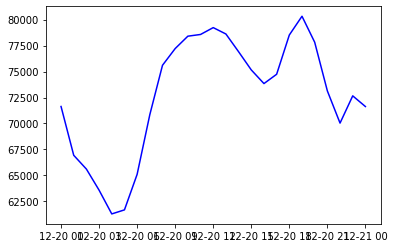

In [64]:
plot_load(Yconso, 2016, 12, 20,1)

<font color='green'>

* Afficher un jour ouvré d’hiver, un jour ouvré d’été, commenter.

</font>

## Afficher une semaine arbitraire de consommation

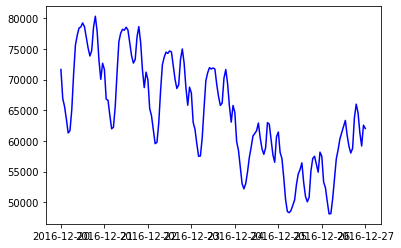

In [65]:
plot_load(Yconso, 2016, 12, 20, delta_days=7)

<font color='green'>

* Commenter.

</font>

## Observation des profils de la consommation pour les mois d'hiver et les mois d'été
Toujours dans le but d'appréhender nos données, on va regarder les profils moyens pour les mois d'été et pour ceux d'hiver. On va également observer le min et le max pour avoir une idée de la variabilité du signal.

In [66]:
# Par commodité, on isole le mois pour après attraper les mois d'hiver et d'été
Xinput['month'] = Xinput['ds'].dt.month

# On isole aussi les heures
Xinput['hour'] = Xinput['ds'].dt.hour

# On sépare les jours de la semaine 
# La fonction datetime.weekday() renvoie 0 => Lundi, 1 => Mardi, ..., 5 => Samedi, 6 => Dimanche
Xinput['weekday'] = Xinput['ds'].dt.weekday 

In [67]:
Xinput.head(5)

,ds,holiday,002_0,002_24,005_0,005_24,015_0,015_24,027_0,027_24,...,675_24,690_0,690_24,747_0,747_24,Th_real_24h_avant,Th_prev,month,hour,weekday
168,2014-01-08 00:00:00+00:00,NaN,10.3,9.69,10.00,9.80,9.69,9.30,10.19,10.5,...,10.6,8.5,9.5,10.7,11.2,9.84693,9.911160,1,0,2
169,2014-01-08 01:00:00+00:00,NaN,10.1,9.40,9.69,9.80,9.40,9.30,10.30,10.3,...,10.1,8.4,9.4,11.0,11.1,9.84850,9.790830,1,1,2
170,2014-01-08 02:00:00+00:00,NaN,10.0,9.19,9.90,9.60,9.19,9.40,10.30,10.0,...,9.6,7.9,9.3,11.6,11.0,9.68158,9.634990,1,2,2
171,2014-01-08 03:00:00+00:00,NaN,9.9,9.00,9.50,9.19,9.19,9.19,10.19,9.8,...,9.1,7.5,9.3,11.1,10.9,9.48713,9.445360,1,3,2
172,2014-01-08 04:00:00+00:00,NaN,9.9,8.80,9.00,8.90,8.90,9.00,10.19,9.6,...,8.8,7.3,9.0,10.8,10.8,9.49041,9.241585,1,4,2


In [68]:
# On aggrège les mois d'hiver ensemble
XY_df = pd.merge(Yconso, Xinput, on = 'ds')
groupedHiver = XY_df[(XY_df.month == 12) | 
                                     (XY_df.month == 1) | 
                                     (XY_df.month == 2)].groupby(['weekday', 'hour'], as_index=True)

# Idem pour les mois d'été
groupedEte = XY_df[(XY_df.month == 6) | 
                                   (XY_df.month == 7) | 
                                   (XY_df.month == 8)].groupby(['weekday', 'hour'], as_index=True)

statsHiver = groupedHiver['y'].aggregate([np.mean, np.min, np.max])
statsEte = groupedEte['y'].aggregate([np.mean, np.min, np.max])
display(statsHiver)

mean   amin   amax
weekday hour                            
0       0     65365.258065  55360  78454
        1     61460.306452  51056  75197
        2     60760.354839  49822  75197
        3     58676.000000  47461  73091
        4     56715.241935  45691  71194
...                    ...    ...    ...
6       19    67981.901639  57070  80942
        20    67888.163934  57139  80422
        21    65419.344262  55295  77923
        22    62934.213115  53033  75755
        23    66101.393443  56162  79201

[168 rows x 3 columns]

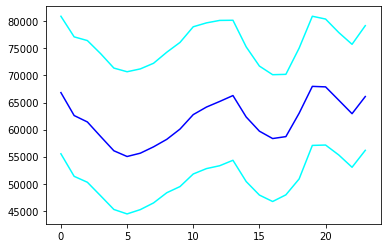

In [69]:
# On affiche des infos sur le profil pour les jours de la semaine
# 0 => Lundi, 1 => Mardi, ..., 5 => Samedi, 6 => Dimanche
jour = statsHiver.loc[6]  

plt.plot(jour['amin'], color='cyan')
plt.plot(jour['mean'], color='blue')
plt.plot(jour['amax'], color='cyan')
plt.show()

## Lien avec la consommation passée
A l'aide de la fonction shift, pour un point horaire cible on regarde  :
- la consommation de l'heure précédente, 
- du jour précédent, 
- de la semaine précédente.


In [70]:
Xinput['lag1H'] = Yconso['y'].shift(1)
Xinput['lag1D'] = Yconso['y'].shift(24)
Xinput['lag1W'] = Yconso['y'].shift(24*7)

Xinput.head(24 * 7 + 1)

,ds,holiday,002_0,002_24,005_0,005_24,015_0,015_24,027_0,027_24,...,747_0,747_24,Th_real_24h_avant,Th_prev,month,hour,weekday,lag1H,lag1D,lag1W
168,2014-01-08 00:00:00+00:00,NaN,10.3,9.69,10.00,9.80,9.69,9.30,10.19,10.5,...,10.7,11.20,9.84693,9.911160,1,0,2,NaN,NaN,NaN
169,2014-01-08 01:00:00+00:00,NaN,10.1,9.40,9.69,9.80,9.40,9.30,10.30,10.3,...,11.0,11.10,9.84850,9.790830,1,1,2,62008.0,NaN,NaN
170,2014-01-08 02:00:00+00:00,NaN,10.0,9.19,9.90,9.60,9.19,9.40,10.30,10.0,...,11.6,11.00,9.68158,9.634990,1,2,2,57298.0,NaN,NaN
171,2014-01-08 03:00:00+00:00,NaN,9.9,9.00,9.50,9.19,9.19,9.19,10.19,9.8,...,11.1,10.90,9.48713,9.445360,1,3,2,56216.0,NaN,NaN
172,2014-01-08 04:00:00+00:00,NaN,9.9,8.80,9.00,8.90,8.90,9.00,10.19,9.6,...,10.8,10.80,9.49041,9.241585,1,4,2,53719.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,2014-01-14 20:00:00+00:00,NaN,7.4,4.59,6.40,3.60,5.50,3.90,5.90,4.9,...,9.4,8.30,6.40173,4.849600,1,20,1,78424.0,73042.0,NaN
333,2014-01-14 21:00:00+00:00,NaN,7.0,4.59,6.50,3.70,5.09,3.60,5.90,5.5,...,8.6,8.19,6.20150,4.762620,1,21,1,76005.0,68737.0,NaN
334,2014-01-14 22:00:00+00:00,NaN,6.9,6.20,5.90,3.80,5.20,3.40,6.10,5.5,...,8.5,8.90,5.97445,4.701705,1,22,1,71543.0,64773.0,NaN
335,2014-01-14 23:00:00+00:00,NaN,6.6,6.50,6.00,3.80,5.20,3.20,6.10,5.8,...,8.1,8.80,5.76064,4.572135,1,23,1,67736.0,67615.0,NaN


On trace maintenant les nuages de points afin de voir s'il y a corrélation ou non :

In [71]:
def plot_scatter_load(var_x):
    plt.scatter(Xinput[var_x],Yconso['y'])
    plt.title(var_x)
    plt.show()

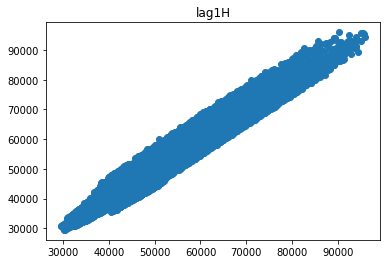

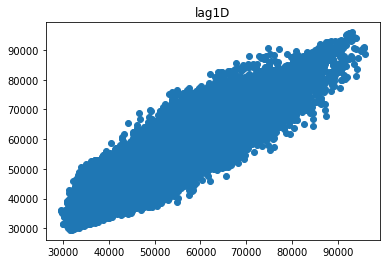

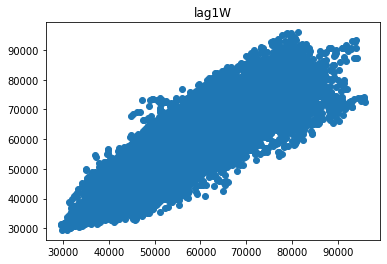

In [72]:
plot_scatter_load('lag1H')
plot_scatter_load('lag1D')
plot_scatter_load('lag1W')

<font color='green'>
    
* Quelle(s) variable(s) vous semble(nt) pertinentes pour construire un modèle de prévision à J+1?

* Lesquelles pouvez-vous raisonnablement utiliser dans un processus opérationnel?

</font>

## Visualiser la consommation en fonction de la température 

On voudrait savoir si la consommation nationale peut s'expliquer en regardant simplement la température moyenne sur la France. Pour cela, on peut aussi tracer un nuage de points.

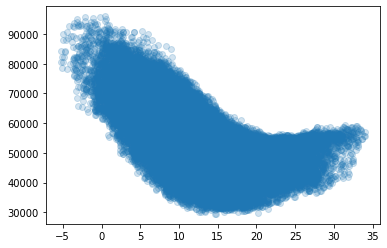

In [74]:
plt.scatter(Xinput['Th_prev'], Yconso['y'], alpha=0.2)
plt.show()

<font color='green'>
    
* Que pensez-vous de ce nuage ? 
* Quelles autres variables explicatives proposeriez-vous? De quels types sont-elles?

<font color='green'>

# Ajout de variables

On récupère le jour de l'année grâce à la fonction *dayofyear*

In [75]:
time = pd.to_datetime(Xinput['ds'], yearfirst=True,utc=True)
Xinput['posan']= time.dt.dayofyear

In [76]:
Xinput.columns


Index(['ds', 'holiday', '002_0', '002_24', '005_0', '005_24', '015_0',
       '015_24', '027_0', '027_24', '070_0', '070_24', '110_0', '110_24',
       '120_0', '120_24', '130_0', '130_24', '145_0', '145_24', '149_0',
       '149_24', '156_0', '156_24', '168_0', '168_24', '180_0', '180_24',
       '190_0', '190_24', '222_0', '222_24', '240_0', '240_24', '255_0',
       '255_24', '260_0', '260_24', '280_0', '280_24', '299_0', '299_24',
       '434_0', '434_24', '460_0', '460_24', '481_0', '481_24', '497_0',
       '497_24', '510_0', '510_24', '579_0', '579_24', '588_0', '588_24',
       '621_0', '621_24', '630_0', '630_24', '643_0', '643_24', '645_0',
       '645_24', '650_0', '650_24', '675_0', '675_24', '690_0', '690_24',
       '747_0', '747_24', 'Th_real_24h_avant', 'Th_prev', 'month', 'hour',
       'weekday', 'lag1H', 'lag1D', 'lag1W', 'posan'],
      dtype='object')

In [77]:
Xinput.to_csv("data/X2input.csv", index = False)